In [ ]:
DATA LOADING AND DATA CLEANING

In [12]:
import pandas as pd

# Load the dataset
file_path = 'retail_sales_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
data.ffill(inplace=True)
print(data)
# Remove duplicates
data = data.drop_duplicates()

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])  # Using the correct column name from the dataset


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [ ]:
DESCRIPTIVE STATISTICS

In [17]:
# Calculate statistics for the correct sales column
mean_sales = data['Total Amount'].mean()  # Replace 'Total Amount' with your sales column name
median_sales = data['Total Amount'].median()
std_sales = data['Total Amount'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Mean Sales: 456.0
Median Sales: 135.0
Standard Deviation of Sales: 559.997631555123


In [ ]:
TIME SERIES ANALYSIS

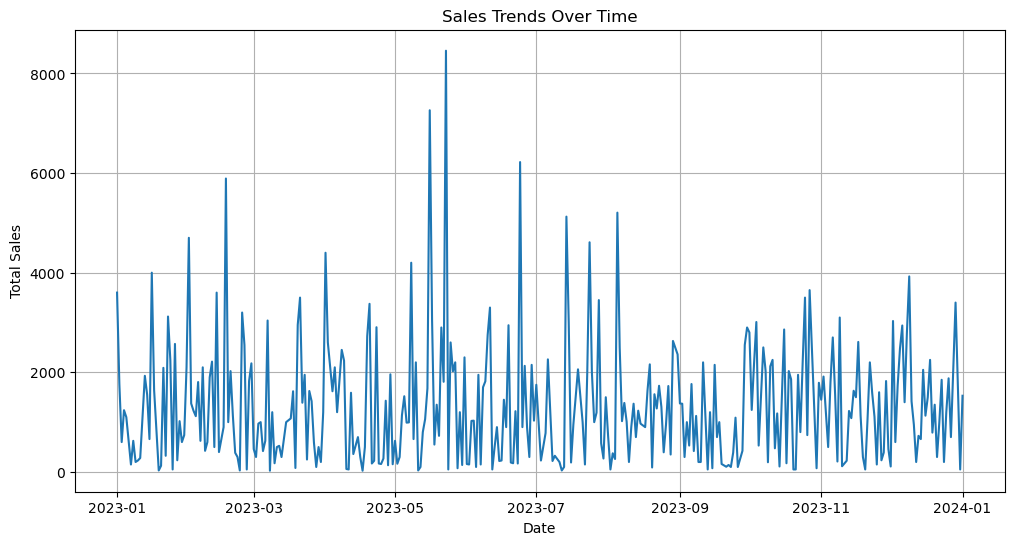

In [18]:
# Strip column names to remove any leading/trailing spaces
data.columns = data.columns.str.strip()

# Aggregate sales over time
time_series = data.groupby('Date')['Total Amount'].sum()  # Replace 'Date' and 'Total Amount' with the actual column names

# Plot sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values)
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [ ]:
CUSTOMER AND PRODUCT ANALYSIS

In [26]:
# Normalize column names
data.columns = data.columns.str.strip().str.title()

# Verify column names
print(data.columns)

# Group by 'Product Category' and sum 'Total Amount'
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Output the top products
print(top_products)


Index(['Transaction Id', 'Date', 'Customer Id', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price Per Unit', 'Total Amount'],
      dtype='object')
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [ ]:
VISULIZATION

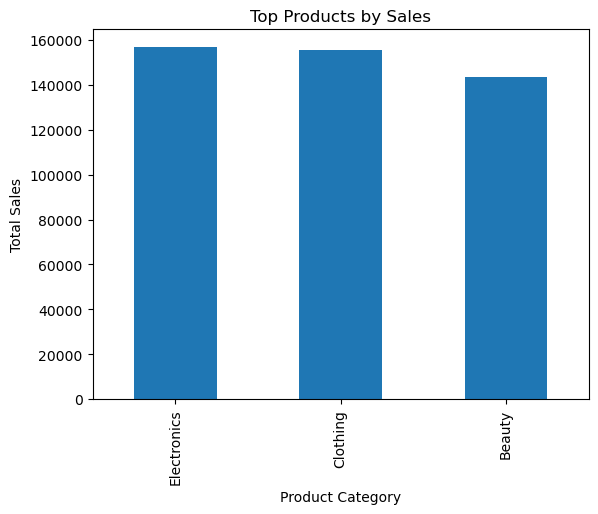

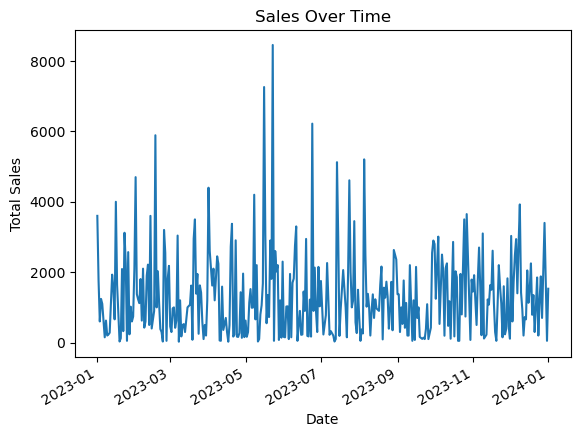

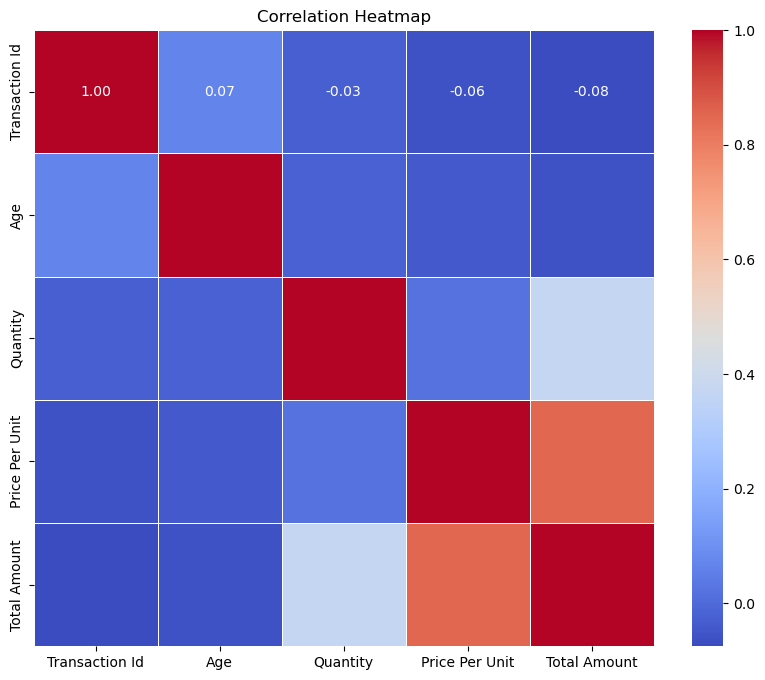

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped and normalized
data.columns = data.columns.str.strip().str.title()

# 1. Bar Plot for Top Products by Sales
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top Products by Sales', xlabel='Product Category', ylabel='Total Sales')
plt.show()

# 2. Line Plot for Sales Over Time
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Group by Date and sum the sales
sales_over_time = data.groupby('Date')['Total Amount'].sum()
sales_over_time.plot(kind='line', title='Sales Over Time', xlabel='Date', ylabel='Total Sales')
plt.show()

# 3. Heatmap of Correlations
# Filter out non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number', 'float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
